# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
data = pd.read_csv('data/spam_or_not_spam.csv')
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


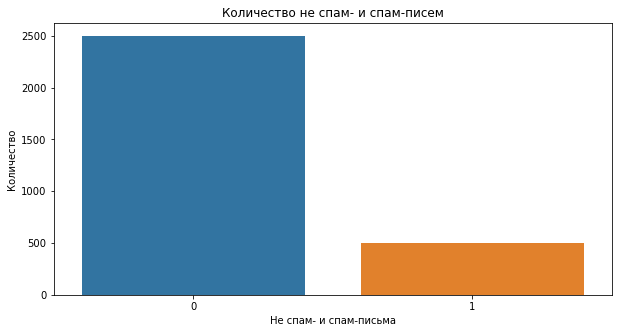

In [3]:
fig = plt.figure(figsize=(10, 5))
countplot = sns.countplot(data['label'])
countplot.set_title('Количество не спам- и спам-писем')
countplot.set_xlabel('Не спам- и спам-письма')
countplot.set_ylabel('Количество');

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [5]:
data['email'] = data['email'].replace('^\s+$', '', regex=True)
data['email'] = data['email'].replace('', np.nan)
data = data.dropna(subset=['email'])

Переводим данные в векторный вид:

In [6]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [7]:
X.shape[1]

34116

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [8]:
y = data['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [10]:
y_test.mean()

0.16533333333333333

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [11]:
mnb = MultinomialNB(alpha=0.01)

mnb.fit(x_train, y_train)

y_test_predict_mnb = mnb.predict(x_test)

In [12]:
cnb = ComplementNB(alpha=0.01)

cnb.fit(x_train, y_train)

y_test_predict_cnb = cnb.predict(x_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [13]:
print(round(accuracy_score(y_test, y_test_predict_mnb), 3))
print(round(precision_score(y_test, y_test_predict_mnb), 3))
print(round(recall_score(y_test, y_test_predict_mnb), 3))
print(round(f1_score(y_test, y_test_predict_mnb), 3))

0.987
1.0
0.919
0.958


In [14]:
print(round(accuracy_score(y_test, y_test_predict_cnb), 3))
print(round(precision_score(y_test, y_test_predict_cnb), 3))
print(round(recall_score(y_test, y_test_predict_cnb), 3))
print(round(f1_score(y_test, y_test_predict_cnb), 3))

0.988
1.0
0.927
0.962


Нарисуйте ROC-кривую:

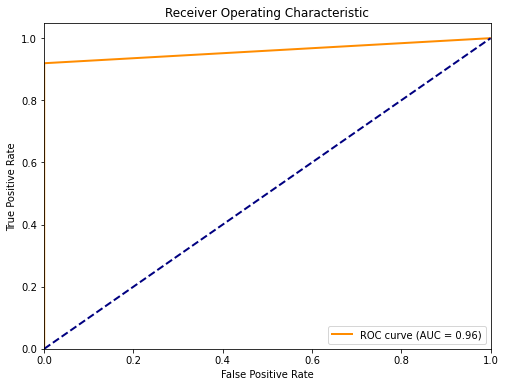

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_mnb)
roc_auc = roc_auc_score(y_test, y_test_predict_mnb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

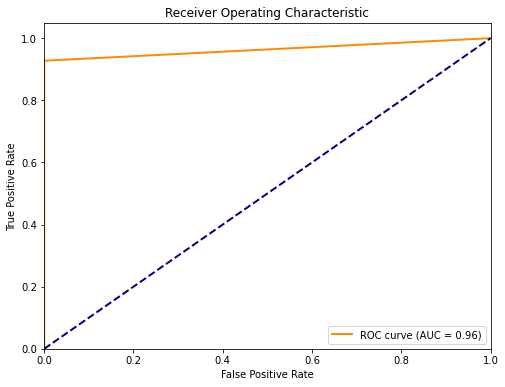

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_cnb)
roc_auc = roc_auc_score(y_test, y_test_predict_cnb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [17]:
# Первый способ

param_grid = {
    'alpha':np.linspace(0.001, 0.1, 10)
}

cnb = ComplementNB()

gscv = GridSearchCV(cnb, param_grid=param_grid, n_jobs=-1)

gscv.fit(x_train, y_train)

print(gscv.best_params_)
print(gscv.best_score_)
print(gscv.cv_results_['mean_test_score'])

{'alpha': 0.067}
0.9906547884187082
[0.98709626 0.98931948 0.98932047 0.98887503 0.9897659  0.99021034
 0.99065479 0.99065479 0.99065479 0.99020935]


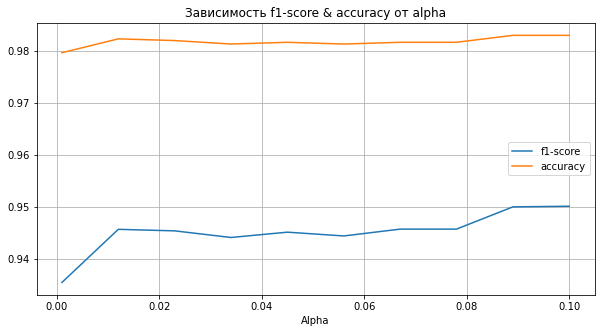

In [18]:
# Второй способ

alpha_range = np.linspace(0.001, 0.1, 10)
f1_scores = []
accuracy = []

for alpha in alpha_range:
    cnb = ComplementNB(alpha=alpha)
    f1 = cross_val_score(cnb, X, y, cv=5, scoring='f1')
    acc = cross_val_score(cnb, X, y, cv=5, scoring='accuracy')
    accuracy.append(acc.mean())
    f1_scores.append(f1.mean())
    
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(alpha_range, f1_scores)
ax.plot(alpha_range, accuracy)
ax.grid()
ax.set_xlabel('Alpha')
ax.legend(['f1-score', 'accuracy'], loc=7)
ax.set_title('Зависимость f1-score & accuracy от alpha');

По графику видно, что качество классификации зависит от величины параметра alpha. С повышением aplha от 0.001 до 0.1 метрики f1_score и accuracy в целом растут. Причём самый значительный рост метрик наблюдается при повышении aplha с 0.001 до примерно 0.01.